飞机作为目前世上最快的交通工具，这一伟大的发明给人们带来了更为快捷的交通出行，但是也必然存在由于一些不可抗拒的原因（如飞鸟撞击）或人为因素（如劫机）造成的空难。全世界每年死于空难的大约1000人，而死于道路交通空难的达70万人，从这个意义讲，乘飞机也许是最安全的交通方式。但是一旦发生飞机失事，幸存者却寥寥无几。<br>
本案例基于Socrata上的开放数据，数据集`Airplane_Crashes_and_Fatalities_Since_1908.csv`记录了全球自1908年以来的部分空难情况。我们对数据做探索分析：哪些年份的空难较多？哪些航空公司的空难较多? 哪些机型的空难较多? 生还和遇难人数如何？空难原因是什么？

# 目录
* 1.[数据说明和读取](#1.数据说明和读取)
* 2.[空难数据的初步探索](#2.空难数据的初步探索)   
* 3.[空难发生年份的分析](#3.空难发生年份的分析) 
* 4.[空难与航空公司的分析](#4.空难与航空公司的分析)
* 5.[军用航班与民用航班的空难分析](#5.军用航班与民用航班的空难分析) 
* 6.[空难与飞机型号的分析](#6.空难与飞机型号的分析) 
* 7.[空难发生地点和航线的分析](#7.空难发生地点和航线的分析) 
* 8.[中国飞机的空难分析](#8.中国飞机的空难分析) 
* 9.[总结](#9.总结)

# 1.数据说明和读取

| 列名 | 类型 | 含义说明 
| ------ | ------ |------ |
|Date|object|日期
|Time|object|时间
|Location|object|空难发生地点
|Operator|object|航空公司，以Military开头代表军用，其余为民用航空公司
|Flight #|object|航班编号
|Route|object|飞行航线
|Type|object|飞机型号
|Registration|object|注册编号
|cn/In|object|结构或序列号/线路或机身编号
|Aboard|float64|登机人数
|Fatalities|float64|乘客遇难人数
|Ground|float64|地面遇难人数
|Summary|object|空难总结




导入需要使用的Python库。

In [254]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

data = pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")
print(data.shape)

(5268, 13)


首先导入数据，数据总共5268行13列，接着我们随机查看两行数据。

In [4]:
data.sample(2)

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4850,04/01/2002,07:25,"Near Cairns, QLD, Australia",Air Taxi,NaN,Cairns - Hicks Island,Shrike Commander 500S,VH-UJB,3152,4.0,4.0,0.0,Crashed into low terrain while en route. Why t...
2847,10/23/1975,19:28,"Cairns Airport, Queensland, Australia",Connair,NaN,Mount Isa - Cairns,de Havilland DH114 Heron 2E,VH-CLS,14067,11.0,11.0,0.0,Improper approach during a storm. Crew error. ...


可以看到，每一行数据记录了空难航班的机型、航空公司、航班编号、飞行航线、伤亡人数等重要信息。在导入数据后，我们接下来进行初步的探索。

# 2.空难数据的初步探索

首先我们查看一下数据中每列的缺失情况。

In [5]:
data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

可以看到，日期、空难发生地点、航空公司、飞机型号、登机人数、乘客遇难人数等重要列缺失较少，我们将空难发生地点、航空公司、飞机型号等列的缺失值填充为`Unknown`(未知)，其余列不影响我们后续的分析，在这里我们先不进行更改。

In [6]:
columns = ['Location','Operator','Type']
for column in columns:
    data[column].fillna('Unknown',inplace = True)

接下来使用统计性描述的方法，查看空难数据中的数字型特征(登机人数、乘客遇难人数和地面遇难人数)的各个统计值。

In [7]:
data.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


可以看到单次空难中，乘客遇难人数的最大值达到了583人，地面遇难人数的最大值达到了2750人，接下来我们查看一下这些"最严重"的空难。

根据乘客遇难人数将数据进行降序排序，我们查看乘客遇难人数最多的5次空难。

In [8]:
data.sort_values(axis = 0, by = 'Fatalities', ascending = False).head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
2963,03/27/1977,17:07,"Tenerife, Canary Islands",Pan American World Airways / KLM,1736/4805,Tenerife - Las Palmas / Tenerife - Las Palmas,Boeing B-747-121 / Boeing B-747-206B,N736PA/PH-BUF,19643/11 / 20400/157,644.0,583.0,0.0,Both aircraft were diverted to Tenerife becaus...
3568,08/12/1985,18:56,"Mt. Osutaka, near Ueno Village, Japan",Japan Air Lines,123,Tokyo - Osaka,Boeing B-747-SR46,JA8119,20783/230,524.0,520.0,0.0,The aircraft suffered an aft pressure bulkhead...
4455,11/12/1996,18:40,"Near Charkhidadri, India",Saudi Arabian Airlines / Kazastan Airlines,763/1907,New Delhi - Dhahran / Chimkent - New Delhi,Boeing B-747-168B / Ilyushin IL-76TD,HZAIH/UN-76435,22748/555/1023413428,349.0,349.0,0.0,Midair collision 17 km W of New Delhi. The Sa...
2726,03/03/1974,11:41,"Near Ermenonville, France",Turkish Airlines (THY),981,Paris - London,McDonnell Douglas DC-10-10,TC-JAV,46704/29,346.0,346.0,0.0,The aircraft crashed shortly after takeoff fro...
3562,06/23/1985,07:15,"AtlantiOcean, 110 miles West of Ireland",Air India,182,Montreal - London,Boeing B-747-237B,VT-EFO,21473/330,329.0,329.0,0.0,The aircraft broke up in flight and crashed in...


结合数据和历史，乘客遇难人数最多的五次空难分别为：
+ 1.特内里费空难，两架波音747客机在洛司罗迪欧机场的跑道上高速相撞爆炸；
+ 2.日本航空123号班机空难，波音747SR-146型客机在距离东京约100公里的高天原山山脊坠毁；
+ 3.恰尔基达德里撞机事件，沙特阿拉伯航空763号班机与哈萨克斯坦航空1907号班机在新德里附近上空相撞；
+ 4.土耳其航空981号班机空难，麦道DC-10客机坠毁于埃尔芒翁维尔一处森林内；
+ 5.印度航空182号空难，波音747-237B客机在爱尔兰领空爆炸，坠入该国西南部的大西洋

我们发现某一些空难造成的地面人员伤亡非常巨大，最大伤亡达到了2750人，很明显飞机坠入或撞击了城市建筑，我们把地面伤亡人数进行排序分析。

In [9]:
data.sort_values(by = 'Ground',ascending = False).head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
4803,09/11/2001,08:47,"New York City, New York",American Airlines,11,Boston - Los Angeles,Boeing 767-223ER,N334AA,22332/169,92.0,92.0,2750.0,The aircraft was hijacked shortly after it lef...
4804,09/11/2001,09:03,"New York City, New York",United Air Lines,175,Boston - Los Angeles,Boeing B-767-222,N612UA,21873/41,65.0,65.0,2750.0,The aircraft was hijacked shortly after it lef...
4390,01/08/1996,12:43,"Kinshasa, Zaire",African Air,NaN,Kinshasa - Kahemba,Antonov AN-32B,RA-26222,2301,6.0,2.0,225.0,The aircraft failed to gain altitude after tak...
4802,09/11/2001,09:45,"Arlington, Virginia.",American Airlines,77,Washington D.C. - Los Angeles,Boeing B-757-223,N644AA,24602/365,64.0,64.0,125.0,The aircraft was hijacked after taking off fro...
2933,10/13/1976,NaN,"Santa Cruz, Bolivia",Lloyd Aéreo Boliviano,NaN,Santa Cruz - Viru,Boeing B-707-31,N730JP,17671/48,3.0,3.0,113.0,The aircraft failed to climb and crashed into ...


我们看到了`911`，地面遇难人数最多！2001年9月11日是很多美国人的噩梦，美国航空11号班机、联合航空175号班机遭到恐怖分子劫持，相隔17分钟分别撞向位于纽约的世界贸易中心双塔，造成飞机上的所有人和在建筑物中许多人遇难，这也印证了我们刚才的推论。

接下来我们查看一下生还人数最多的空难，首先我们使用登机人数-乘客遇难人数来计算生还人数。

In [10]:
data['Survivor'] = data['Aboard'] - data['Fatalities']

对生还人数进行降序排序。

In [11]:
data.sort_values(by = 'Survivor',ascending = False).head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary,Survivor
4645,07/23/1999,11:25,"Tokyo, Japan",All Nippon Airways,61,"Tokyo, Japan - Chitose, Japan",Boeing B-747,NaN,NaN,517.0,1.0,0.0,Two minutes after taking off from Haneda Airpo...,516.0
4536,12/28/1997,23:10,Over the PacifiOcean,United Air Lines,826,Tokyo - Honolulu,Boeing B-747-122,N4723U,19882/175,393.0,1.0,0.0,"Two hours into the flight, at FL 310, the plan...",392.0
3640,09/05/1986,06:00,"Karachi, Pakistan",Pan American World Airways,73,Bombay-Karachi-Frankfurt-New York,Boeing B-747-121,N656PA,20351/127,384.0,16.0,1.0,"While on the ground, four hijackers opened fir...",368.0
3829,02/24/1989,02:09,"Honolulu, Hawaii",United Air Lines,811,Los Angeles - Honolulu - Auckland - Sidney,Boeing B-747-122,N4713U,19875/89,356.0,9.0,0.0,"After leaving Honolulu, on a flight from Los A...",347.0
3378,09/13/1982,12:00,"Near Malaga, Spain",Spantax,995,Malaga - New York City,McDonnell Douglas DC-10-30CF,EC-DEG,46962/238,394.0,50.0,0.0,The aircraft crashed during takeoff after inte...,344.0


结合数据和历史，生还人数最多的五次空难分别为：
+ 1.全日空61号班机劫机事件，1999年7月23日，一架波音747-481D被劫持，机长被劫机者刺杀，但飞机最后最终安全返航羽田机场。
+ 2.联合航空826号班机空难，一架波音747-122飞行中遇到晴空湍流，致使103人受伤，一人更因伤势过重不幸身亡。
+ 3.泛美航空73号班机劫机事件，1986年9月5日，一架波音747-121被劫持，劫机目的是袭击以色列国防部，飞机上16人被杀害。
+ 4.联合航空811号班机空难，1989年2月24日，一架波音747-122型客机攀升至22,000～23,000英尺（6,700～7,000米）上空时突然出现爆炸，造成9人遇难。
+ 5.斯班达斯航空995号班机空难，造成50人遇难。

# 3.空难发生年份的分析

在对空难数据的进行初步探索之后，接下来我们分析一下空难发生的年份。首先我们将发生日期`Date`转换为Pandas中的时间格式。

In [240]:
data['Date'] = pd.to_datetime(data['Date'])

现在Date已经转成了datetime时间格式，下边我们分析一下每年的空难次数，通过折线图的方法进行展示。

## 3.1 每年的空难次数

In [207]:
import plotly.graph_objects as go

year = data.groupby(data.Date.dt.year).size().index
times = data.groupby(data.Date.dt.year).size().values

fig = go.Figure()

fig.add_trace(go.Scatter(x=year, y=times,line=dict(color='royalblue', width=4)))

fig.update_layout(title='每年的空难次数',
                   xaxis_title='年份',
                   yaxis_title='次数')
fig.show()

可以看到：
+ 从全球范围来看，空难数量是一直呈增加趋势的，在70年代达到顶点，之后总体呈下降趋势。
+ 在40年代中期，60年代末和80年代末都出现了空难的高峰。


## 3.2 每年的空难乘客遇难人数和遇难率

+ 将数据按照`年`进行分组后，对每组中乘客遇难人数进行求和，计算每年的乘客遇难人数。
+ 随着飞机性能的提升和更先进的应急措施，飞机的安全系数逐渐变高，即使遇到空难也能更好的减少人员伤亡。我们通过计算乘客遇难人数与登机人数的比值，分析一下每年空难的死亡率。

In [252]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot

year = data.groupby(data.Date.dt.year).size().index
death_toll = data.groupby(data.Date.dt.year)['Fatalities'].sum()
aboard_num = data.groupby(data.Date.dt.year)['Aboard'].sum()
death_ratio = death_toll/aboard_num

fig = go.Figure()

trace1 = go.Scatter(x=year, y=death_toll,name = "遇难人数",line=dict(color='firebrick', width = 4),yaxis = 'y1')
trace2 = go.Scatter(x=year, y=death_ratio,name = "遇难率",line=dict(color='olive',width = 4,dash = 'dot'),yaxis = 'y2')
trace = [trace1,trace2]

layout = dict(title = '每年的乘客遇难人数与遇难率的对比',
              yaxis1 = dict(title='遇难人数'),
              yaxis2 = dict(title='遇难率',overlaying='y',side='right'))

fig = dict(data = trace, layout = layout)

iplot(fig)

可以看到：
+ 空难的乘客遇难人数也在上世纪60年代末和80年代末达到顶峰，之后总体呈现下降趋势。
+ 从100年的整体来看，空难死亡率逐步下降，从侧面反应了人类飞行技术的进步以及更好的应急措施。

# 4.空难与航空公司的分析

接下来我们分析一下哪些航空公司的空难数较多。我们将数据按照航空公司进行分组，求出空难最多的前10个航空公司，通过柱状图的方式展现不同航空公司的空难次数及对应的死亡人数。

In [255]:
import plotly.express as px

counts = data['Operator'].value_counts().head(10)

fig = px.bar(counts, x='year', y='pop')
fig.show()

AttributeError: 'Series' object has no attribute 'columns'

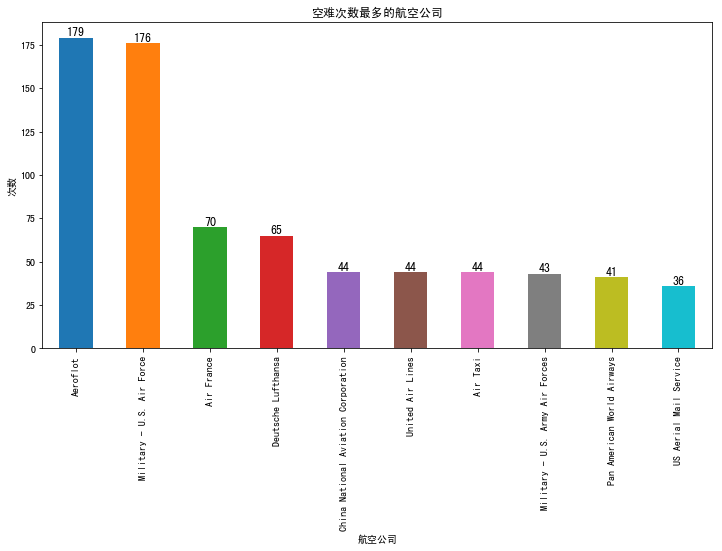

In [171]:
plt.figure(figsize=(12,6))

data['Operator'].value_counts().head(10).plot(kind='bar')

# 在柱形上方显示计数
counts = data['Operator'].value_counts().values
for index, item in zip(np.arange(10), counts): 
    plt.text(index, item, item, ha="center", va= "bottom", fontsize=12) 
    
plt.xlabel('航空公司')
plt.ylabel('次数')
plt.title('空难次数最多的航空公司')
plt.show()

从飞机的归属来看，空难数最多的是俄罗斯国际航空公司(Aeroflot)，空难数达到了179起，不愧是战斗民族；其次是美国空军(U.S. Air Force)176起；排在第三的是法国航空(Air France)，空难数为70起。

# 5.军用航班与民用航班的空难分析

我们先从数据中提取军用航班和民用航班的的空难数据，分别保存在`Military_flights`和`Civil_flights`中，同时打印各自的空难数。

In [172]:
Military_flights = data[data['Operator'].str.contains('Military')]
Civil_flights = data[~data['Operator'].str.contains('Military')]
print('军用航班空难数:',len(Military_flights),'\n民用航班空难数:',len(Civil_flights))


军用航班空难数: 781 
民用航班空难数: 4487


接下来我们根据空难数进行排序，分析哪些军事机构空难数最多。

In [173]:
print('\n军用航班空难机构排名top10:\n',Military_flights['Operator'].value_counts()[:10])


军用航班空难机构排名top10:
 Military - U.S. Air Force                 176
Military - U.S. Army Air Forces            43
Military - U.S. Navy                       36
Military - Royal Air Force                 36
Military - U.S. Army                       23
Military -Royal Air Force                  22
Military - Indian Air Force                16
Military - German Navy                     15
Military - Afghan Republican Air Force     15
Military - Russian Air Force               14
Name: Operator, dtype: int64


可以看到：美国空军、美国陆军航空兵、美国海军、英国皇家空军、美国陆军位于军用航班空难榜的前五名。从国家军队发生空难的次数来看，在美国发生的空难数远超其他国家，说明了美国在试飞、训练、军演、特殊任务、局部战争中经常出现飞机失事的情况，也从侧面说明了美国在20世纪的军事霸主地位。

接下来，我们通过可视化的方法分析一下军用航班和民用航班的占比，以及将两者每年的空难次数进行对比。

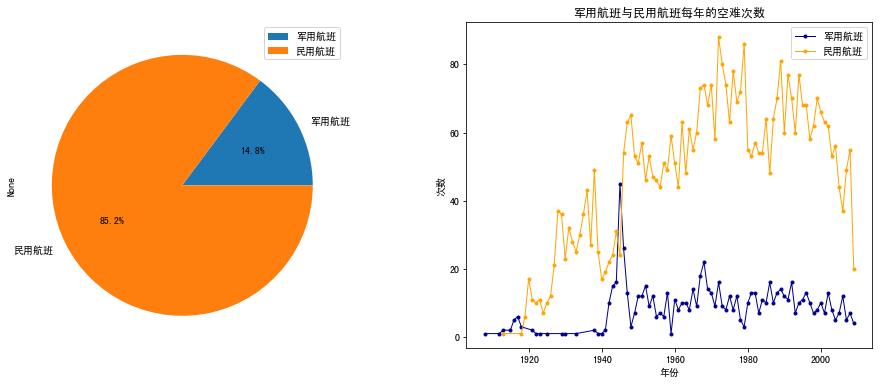

In [174]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(16,6))

pd.Series([len(Military_flights),len(Civil_flights)],index = ['军用航班','民用航班']).plot(kind = 'pie',autopct='%1.1f%%',ax = ax1)

Military_flights.groupby(Military_flights.Date.dt.year).size().plot(color = 'darkblue', marker = ".", linewidth = 1,ax = ax2)
Civil_flights.groupby(Civil_flights.Date.dt.year).size().plot(color = 'orange', marker = ".", linewidth = 1,ax = ax2)

ax1.legend(['军用航班','民用航班'])
ax2.legend(['军用航班','民用航班'])
ax2.set_xlabel('年份')
ax2.set_ylabel('次数')
ax2.set_title('军用航班与民用航班每年的空难次数')

plt.show()

# 6.空难与飞机型号的分析

接下来我们分析一下哪些飞机型号的空难数较多。我们将数据按照飞机型号进行分组，求出空难最多的前10个飞机型号，通过柱状图的方式展现不同飞机型号的空难次数。

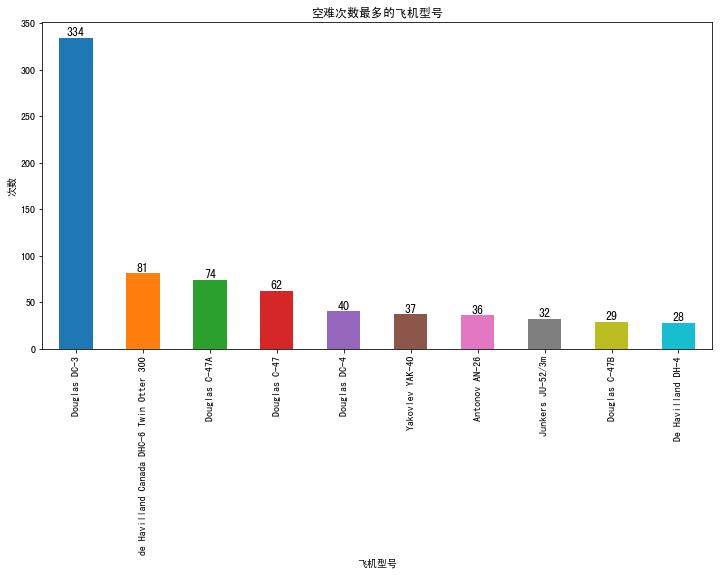

In [175]:
plt.figure(figsize=(12,6))

data['Type'].value_counts().head(10).plot(kind='bar')

# 在柱形上方显示计数
counts = data['Type'].value_counts().values
for index, item in zip(np.arange(10), counts): 
    plt.text(index, item, item, ha="center", va= "bottom", fontsize=12) 
    
plt.xlabel('飞机型号')
plt.ylabel('次数')
plt.title('空难次数最多的飞机型号')
plt.show()

+ 从机型来看，空难数第一的是“道格拉斯DC-3型飞机”，其次是"德哈维兰加拿大DHC-6"，再之后是"道格拉斯DC-47A",和“DC-47”。
+ 需要说明的是，DC-47实际上就是DC-3的军用型，二战结束之后，大量的DC-47转为民用，这时它们就又用回了DC-3这个型号。
+ DC-3及其军用型的总空难数，在空难数前十的机型的空难之和中，占到了62.5%。

# 7.空难发生地点和航线的分析

接下来我们分析一下哪些地点的空难数较多。我们将数据按照空难发生地点进行分组，求出空难发生最多的前10个地点，通过柱状图的方式展现不同地点的空难次数。

In [159]:
locations = list(data['Location'].value_counts().head(2).index)
values = list(data['Location'].value_counts().head(2).values)

In [160]:
locations

['Sao Paulo, Brazil', 'Moscow, Russia']

In [161]:
Locations = []
for location in locations:
    try:
        Locations.append(location.split(', ')[1])
    except:
        pass

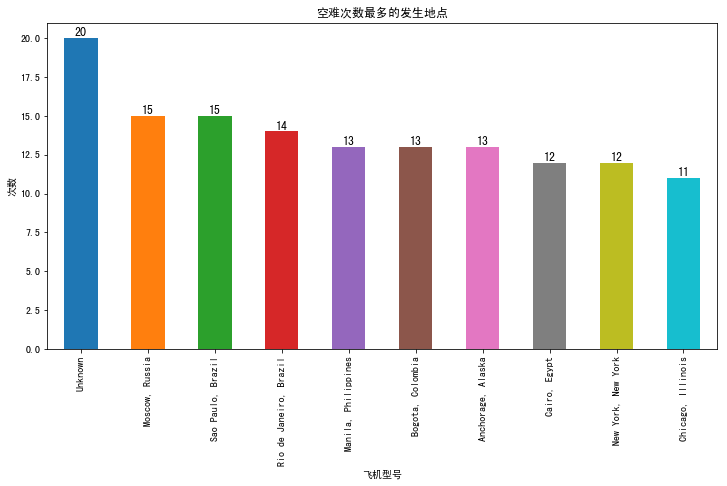

In [176]:
plt.figure(figsize=(12,6))

data['Location'].value_counts().head(10).plot(kind='bar')

# 在柱形上方显示计数
counts = data['Location'].value_counts().values
for index, item in zip(np.arange(10), counts): 
    plt.text(index, item, item, ha="center", va= "bottom", fontsize=12) 
    
plt.xlabel('飞机型号')
plt.ylabel('次数')
plt.title('空难次数最多的发生地点')
plt.show()

可以看到：莫斯科、圣保罗、里约热内卢、马尼拉等城市发生空难的次数较多。接下来我们选取空难次数最多的前10个飞行航线。

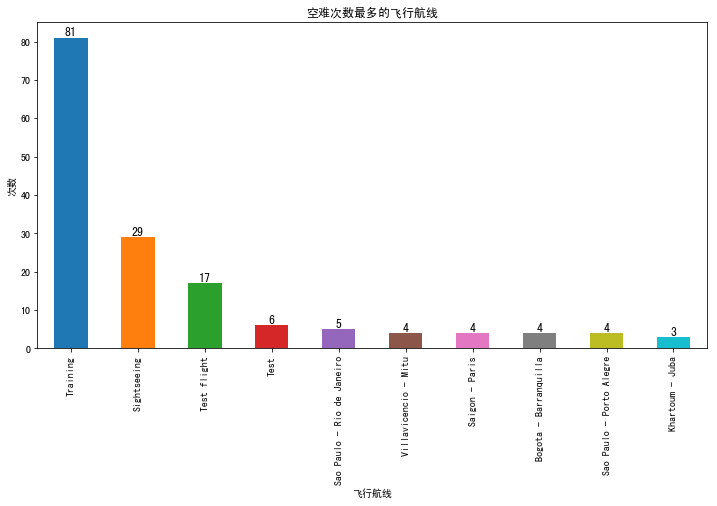

In [177]:
plt.figure(figsize=(12,6))

data['Route'].value_counts().head(10).plot(kind='bar')

# 在柱形上方显示计数
counts = data['Route'].value_counts().values
for index, item in zip(np.arange(10), counts): 
    plt.text(index, item, item, ha="center", va= "bottom", fontsize=12) 
    
plt.xlabel('飞行航线')
plt.ylabel('次数')
plt.title('空难次数最多的飞行航线')
plt.show()

可以看到：
+ 在日常训练、观光、测试飞行航线造成的空难次数较多。
+ 正式飞行航线中，圣保罗 - 里约热内卢，比亚维森西奥 - 米图，西贡 - 巴黎，波哥大 - 巴兰基亚，圣保罗 - 阿雷格里港等航线空难次数较多。

# 8.中国飞机的空难分析

接下来，我们单独分析一下中国航班的空难情况。我们首先选取出中国航班，通过在航空公司中匹配关键词`China`和`Taiwan`，筛选出中国空难的航班数据，保存在变量`china_flights`中。

In [178]:
china_flights = data[data['Operator'].str.contains('China|Taiwan')]
print('中国飞机的空难记录数为：',len(china_flights),'\n')
print('航空公司分别为：\n',china_flights['Operator'].value_counts())

中国飞机的空难记录数为： 84 

航空公司分别为：
 China National Aviation Corporation                44
China Airlines (Taiwan)                            14
Taiwan Airlines                                     4
China Eastern Airlines                              4
Military - Republiof China Air Force                4
China Southwest Airlines                            2
China Southern Airlines                             2
China Northern Airlines                             2
China Northwest Airlines                            2
Air China                                           1
China Southwest Airlines / Xiamen Airlines          1
China Flying Dragon Aviation (Feilong Airlines)     1
China Air Lines                                     1
Taiwan Aviation                                     1
China General Aviation Corporation                  1
Name: Operator, dtype: int64


可以看到，我们选取出84条中国空难记录，其中国航和中华航空(台湾)空难数最多，其次是台湾航空、中国东航和中国空军。接下来，我们将中国飞机的空难情况按`年`进行分组，分析每年的空难次数。

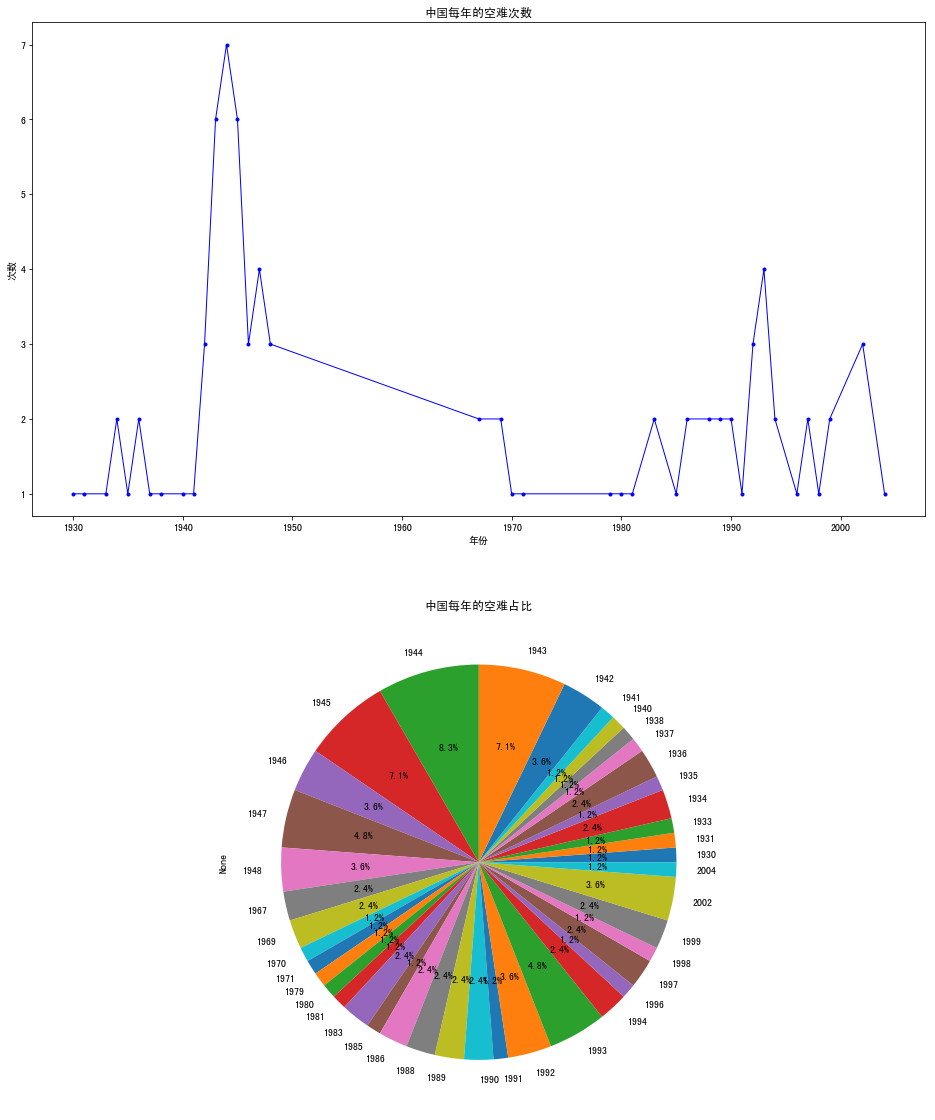

In [179]:
fig,[ax1,ax2] = plt.subplots(2,1,figsize=(16,20))

china_flights.groupby(china_flights.Date.dt.year).size().plot(color = 'blue', marker = ".", linewidth = 1,ax = ax1)
china_flights.groupby(china_flights.Date.dt.year).size().plot(kind = 'pie',autopct='%1.1f%%',ax = ax2)

ax1.set_xlabel('年份')
ax1.set_ylabel('次数')
ax1.set_title('中国每年的空难次数')
ax2.set_title('中国每年的空难占比')

plt.show()

我们可以很明显的看到，中国空难数量在1940年代出现了巨幅的上升，而后又迅速下降。接下来我们单独把1940-1950年的空难发生数据进行分析。

In [180]:
war_flights = china_flights[(china_flights['Date'] >= pd.Timestamp(1940,1,1)) & (china_flights['Date'] <= pd.Timestamp(1950,1,1))]
print('中国在1940-1950年空难次数:',len(war_flights),'\n乘客遇难人数:',war_flights['Fatalities'].sum())
print('中国在1940-1950年空难机型:\n',war_flights['Type'].value_counts())

中国在1940-1950年空难次数: 34 
乘客遇难人数: 374.0
中国在1940-1950年空难机型:
 Douglas C-47                15
Douglas C-53                 4
Douglas DC-3                 4
Curtiss C-46                 2
Douglas DC-2                 2
Unknown                      2
Douglas C-54B-5-DO           1
Ford 5-AT Tri-Motor          1
Curtiss C-46, C-47, DC-3     1
Douglas DC-2-221             1
Douglas DC-4                 1
Name: Type, dtype: int64


可以看到
+ 1940-1950，时间正值二战和解放战争期间。这期间发生空难的机型主要是C-47和C-53两种，这两型飞机是二战中，中国使用的最主要的两种军用运输机。这说明1940年代剧增的空难数的确是战争造成的。
+ 在此期间共发生了34起空难，占到了中国总空难数的40.4%，共有374人遇难。

# 9.总结


首先我们对部分缺失值进行了填充，分析了几个伤亡最大的空难和对应的历史事件；
接着我们按照时间进行分组，分析了每年的空难发生情况和遇难情况；接着我们按照航空公司进行分组，展示了空难数最多的航空公司和对应的空难次数；
然后我们分别对比了军用航班和民用航班的空难情况；接着分析了不同的飞机型号、不同的航线与不同的失事地点的空难情况；最后选取了中国航班数据，按照时间段分析了中国航空的空难情况。



